
# CODE TO CLASSIFY IMAGES (CIFAR-10) USING CNNs
# Dr. Ryan Ahmed @STEMplicity
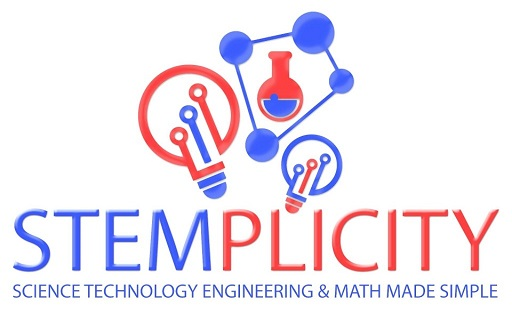



# STEP 0: PROBLEM STATEMENT

- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes: 
    - Airplanes
    - Cars 
    - Birds
    - Cats
    - Deer
    - Dogs
    - Frogs
    - Horses
    - Ships
    - Trucks

- The dataset stands for the Canadian Institute For Advanced Research (CIFAR)
- CIFAR-10 is widely used for machine learning and computer vision applications. 
- The dataset consists of 60,000 32x32 color images and 6,000 images of each class.
- Images have low resolution (32x32). 
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html


# STEP #1: IMPORT LIBRARIES/DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn 

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# STEP #2: VISUALIZE DATA

[0]


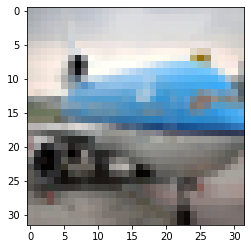

In [7]:
i = 700
plt.imshow(X_train[i])
print(y_train[i])
# y's number is the class that listed before

/Applications/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


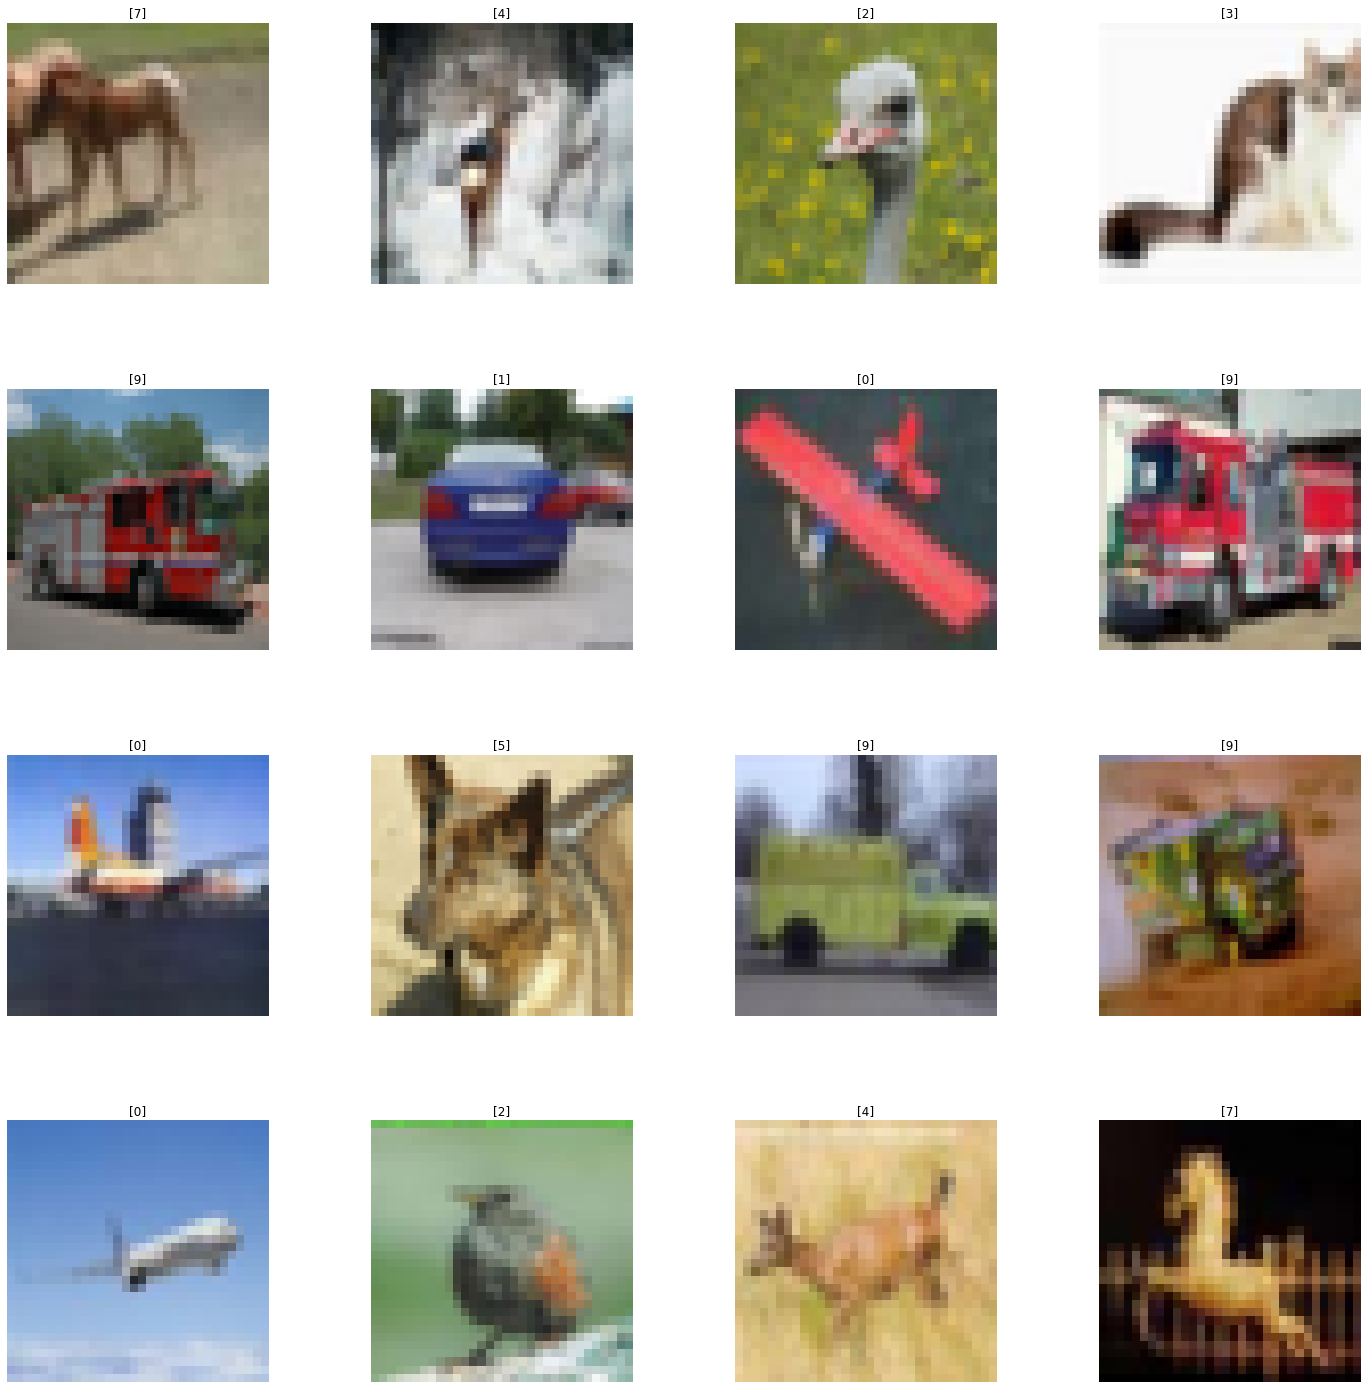

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

#以上是create放下面这些图片的框框

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index]) 
    axes[i].set_title(y_train[index])
    axes[i].axis('off') # 把axis去掉
    
plt.subplots_adjust(hspace = 0.4) #change between the images

In [9]:
n_training

50000

# STEP #3: DATA PREPARATION

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10
# categories

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)
# don't understand keras.utils.to_categorical
# make the training easier

In [14]:
y_train
# change y_train array to categories

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train = X_train/255
X_test = X_test/255
# change to decima

In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

# STEP #4: TRAIN THE MODEL

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [23]:
cnn_model = Sequential()
# create layers1. convolution layer, first layer needs to know the input shape
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
# second convolution layer
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4)) # drop 40% of the neurons

# increase the depth of the layers
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

# flattening
cnn_model.add(Flatten())

# add fully connected networks
# units: # of neurons that I need
cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

# output layer
# relu used in regression task, softmax used in classification task
cnn_model.add(Dense(units = 10, activation = 'softmax'))

2022-03-12 17:47:09.593147: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-12 17:47:09.594173: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), 
                  metrics = ['accuracy'])
# root mean square error:rmsprop, lr=learning rate

In [ ]:
# fit the data to the model
history = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)
# shuffle 让这些image to be random

Epoch 1/2
50000/50000 [==============================] - 631s 13ms/step - loss: 1.6557 - accuracy: 0.4054
Epoch 2/2
21696/50000 [============>.................] - ETA: 6:05 - loss: 1.2574 - accuracy: 0.5595

# STEP #5: EVALUATE THE MODEL

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
predicted_classes = cnn_model.predict_classes(X_test) 
predicted_classes

In [ ]:
y_test

In [ ]:
y_test = y_test.argmax(1)
# turn the array back to decimal value (which means from float32 back to int64)

In [ ]:
y_test

In [ ]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# STEP #6: SAVING THE MODEL

In [ ]:
import os 
directory = os.path.join(os.getcwd(), 'saved_models')
# os.getcwd get current directoray, 'saved_models' is a folder

# 如果存在这个directory就直接储存，没有就新建一个
if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# STEP #7: IMPROVING THE MODEL WITH DATA AUGMENTATION

- Image Augmentation is the process of artificially increasing the variations of the images in the datasets by flipping, enlarging, rotating the original images. 
- Augmentations also include shifting and changing the brightness of the images.

# STEP 7.1 DATA AUGMENTATION FOR THE CIFAR-10 DATASET

In [ ]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train.shape

In [ ]:
n = 8 
X_train_sample = X_train[:n]

In [ ]:
X_train_sample.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# dataget_train = ImageDataGenerator(rotation_range = 90)
#dataget_train = ImageDataGenerator(vertical_flip=True)
#dataget_train = ImageDataGenerator(height_shift_range=0.5)
dataget_train = ImageDataGenerator(brightness_range=(1,3))
# 点击imagedatagenerator, then use tab+shift去查看都有什么操作

dataget_train.fit(X_train_sample)

In [ ]:
from PIL import Image

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample, batch_size = n):
     for i in range(0,n):
            ax = fig.add_subplot(1, n, i+1) # 从第一个到第八个都add进去
            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
     fig.suptitle('Augmented images (rotated 90 degrees)')
     plt.show()
     break;
    # we need to break the for loop


# STEP 7.2 MODEL TRAINING USING AUGEMENTED DATASET

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range = 90,
                            width_shift_range = 0.1,
                            horizontal_flip = True,
                            vertical_flip = True
                             )

In [ ]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)
# 再跑这个的时候不要跑step7，不然会出现shape error

In [ ]:
score = cnn_model.evaluate(X_test, y_test)
print('Test accuracy', score[1])

In [ ]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)

# GREAT JOB! 